In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
my_housing_data = pd.read_csv("/content/housing.csv")

my_housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
my_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
my_housing_data.drop("ocean_proximity",axis=1,inplace=True)

In [ ]:
# my_housing_data.head()
import seaborn as sns

<Axes: xlabel='median_income', ylabel='median_house_value'>

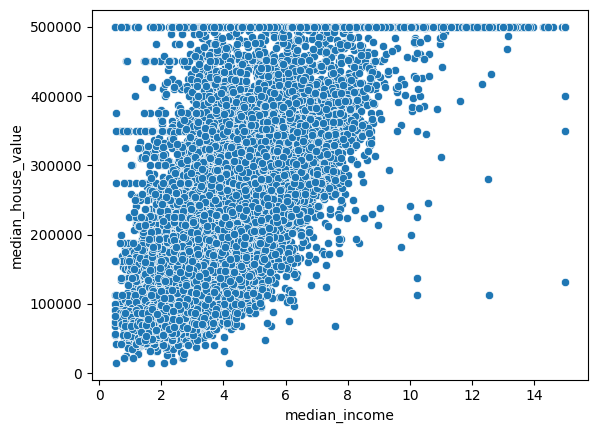

In [ ]:
# sns.pairplot(my_housing_data)
sns.scatterplot(x="median_income", y="median_house_value", data=my_housing_data)

In [ ]:
my_housing_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
my_housing_data["total_bedrooms"].count()

20433

In [ ]:
my_housing_data.dropna(subset=["total_bedrooms"],inplace=True)

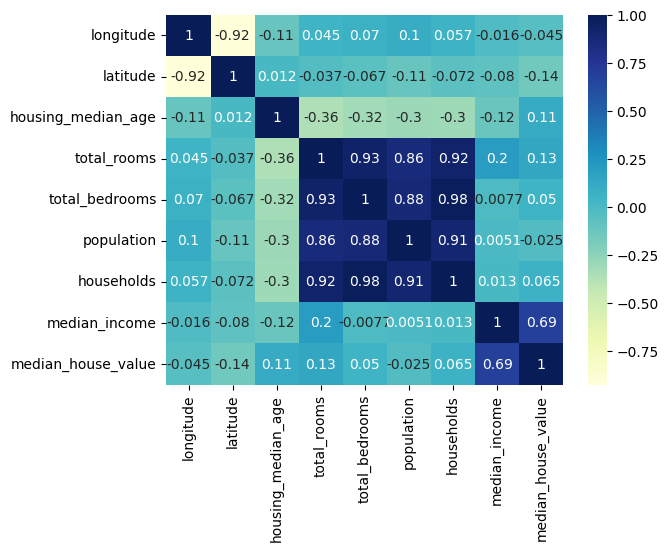

In [ ]:
sns.heatmap(my_housing_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
#Relevant features are: median_income(the most relevant), total_rooms, housing_median_age, total_rooms
# my_housing_data.isnull().sum()
#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Selecting the relevant features i.e X and Y values
X = my_housing_data[["median_income","total_rooms","housing_median_age","total_rooms"]]
y = my_housing_data["median_house_value"]

In [ ]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize the model
model = LinearRegression()

#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predict the y values(median_house_value in this case)
predictions = model.predict(X_test)

In [ ]:
#import r2_score for model evaluation
from sklearn.metrics import r2_score

In [ ]:
#Evaluating the model
#Find the MSE(Magnitude Squared Error)
mse = mean_squared_error(y_test, predictions)
#Calculate the Root Mean Square Erro(RMSE)
rmse = np.sqrt(mse)
#Calculate the R2 score
r2 = r2_score(y_test, predictions)

#Print the values of mse, rmse, r2score
print(f"Mean squared error is: {mse}")
print(f"Root mean square error is: {rmse}")
print(f"The r2_score is: {r2}")

Mean squared error is: 6649671695.107483
Root mean square error is: 81545.51916020575
The r2_score is: 0.5137415878339668


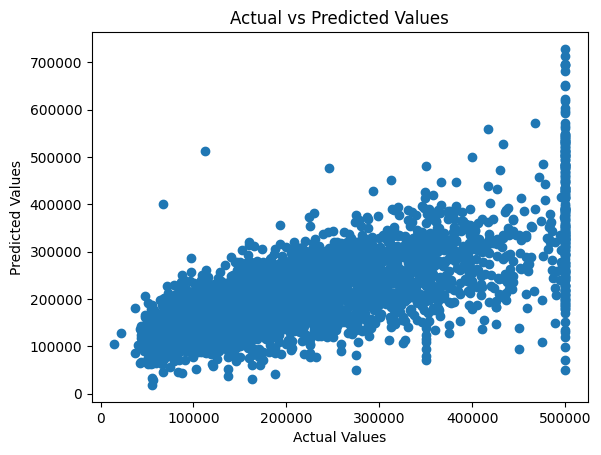

In [ ]:
#Visualize the results
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [ ]:
#Interpret the model coefficiency
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)

                     Coefficient
median_income       42440.080688
total_rooms             1.912397
housing_median_age   1959.314671
total_rooms             1.912397
